# [IAPR][iapr]: Lab 2 ‒  Object description


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 26.03.2021  
**Due date:** 23.04.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try:
1. Fourier Descriptors (15pts). 
    1. Implementation (10 pts).
    2. Showing invariance to rotation, translation and scaling (5 pts).
2. Additional method of your choice (5 pts)


**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point. Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

### 1.1 Data visualization

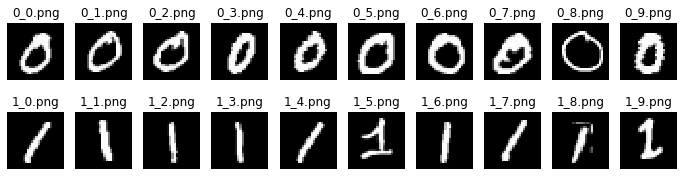

In [3]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
#  Load zeros and ones
zeros_im, zeros_names = load(data_part1, digit='0')
ones_im, ones_names = load(data_part1, digit='1')


# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors (15 pts)

'\n\n'

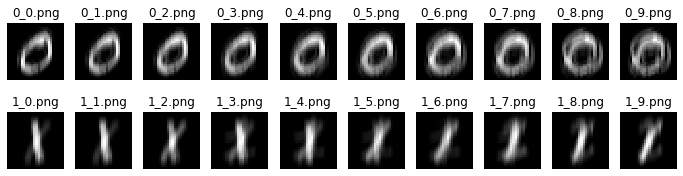

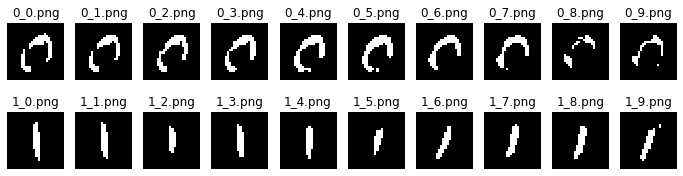

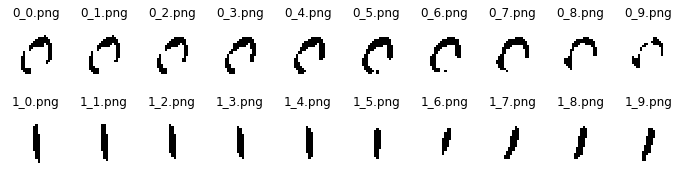

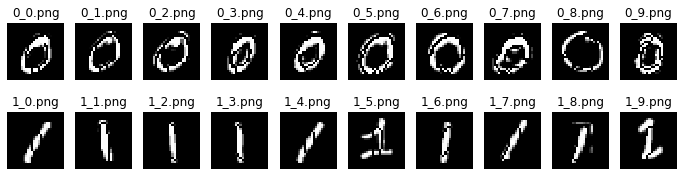

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import erosion, remove_small_objects, disk, dilation


#Image Smoothing

kernel = np.ones((5,5),np.float32)/25

Conv_zeros_im = cv2.filter2D(zeros_im,-1,kernel)
Conv_ones_im = cv2.filter2D(ones_im,-1,kernel)


#Gaussian_zeros_im = cv2.GaussianBlur(zeros_im,(3,3),0)   #bilateral filter can be used hier
#Gaussian_ones_im = cv2.GaussianBlur(ones_im,(3,3),0)

fig, axes = plt.subplots(2, len(Conv_zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], Conv_zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], Conv_ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)


#image binarization

ret,Binary_zeros_im = cv2.threshold(Conv_zeros_im,127,255,cv2.THRESH_BINARY_INV)
ret,Binary_ones_im = cv2.threshold(Conv_ones_im,127,255,cv2.THRESH_BINARY_INV)

fig, axes = plt.subplots(2, len(Binary_zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], Binary_zeros_im, zeros_names):
    ax.imshow(im, cmap='binary')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], Binary_ones_im, ones_names):
    ax.imshow(im, cmap='binary')
    ax.axis('off')
    ax.set_title(nm)

#Mathematical Morphology(open)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
#np.ones((2,2),np.uint8)

opening_zeros_im = cv2.morphologyEx(Binary_zeros_im, cv2.MORPH_OPEN, kernel)
opening_ones_im = cv2.morphologyEx(Binary_ones_im, cv2.MORPH_OPEN, kernel)

g_opening_zeros_im = 255 * opening_zeros_im
g_opening_ones_im = 255 * opening_ones_im   #erosion and dilation change the ndarray, 
                                             #so this line converts it back to 0 to 255 values

fig, axes = plt.subplots(2, len(g_opening_zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], g_opening_zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], g_opening_ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
    
#find Contours

#g_opening_zeros_im = g_opening_zeros_im.astype(np.uint8)

contours_zeros_im = []
contours_ones_im = []

for x in range(len(g_opening_zeros_im)):
    
    g_opening_zeros_im[x] = g_opening_zeros_im[x].astype(np.uint8)
    g_opening_ones_im[x] = g_opening_ones_im[x].astype(np.uint8)
    x0, hierarchy = cv2.findContours(g_opening_zeros_im[x], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_zeros_im.append(x0)
    x1, hierarchy = cv2.findContours(g_opening_ones_im[x], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_ones_im.append(x1)
    


contours_zeros_im = np.array(contours_zeros_im)
contours_ones_im = np.array(contours_ones_im)




fig, axes = plt.subplots(2, len(contours_zeros_im), figsize=(12, 3))

for ax, img, im_contour, nm in zip(axes[0], zeros_im, contours_zeros_im, zeros_names):
    #把轮廓画在原来的图片上
    _ = cv2.drawContours(img, im_contour, -1, (0, 255, 0), 1)
    ax.imshow(img,'gray')
    ax.axis('off')
    ax.set_title(nm)

for ax, img, im_contour, nm in zip(axes[1], ones_im,contours_ones_im, ones_names):
    _ = cv2.drawContours(img, im_contour, -1, (0, 255, 0), 1)
    ax.imshow(img, cmap= 'gray')
    ax.axis('off')
    ax.set_title(nm)
"""

"""

    
    


#fourierDescriptor


In [87]:
g_opening_zeros_im.shape

(10, 28, 28)

### 1.3 Additional method (5 pts)

---
## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

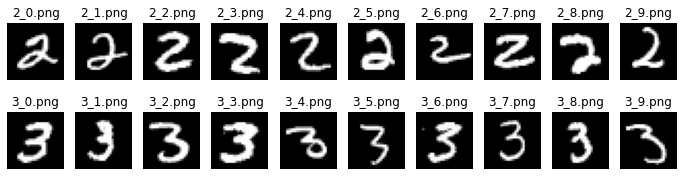

In [3]:
#  Load twos and threes
twos_im, twos_names = load(data_part2, digit='2')
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Fourier descriptors - 4 digits (10 pts)

In [ ]:
# Add your implementation and discussion